# 2. General Data Preparation II

Tasks to perform:  

2.1. Merge lyrics with audio features data  
2.2. Remove songs without lyrics  

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read lyrics
lyrics_df = pd.read_csv('Data/spotify_sg_lyrics_raw_2.csv')
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  1783 non-null   object
 1   title    1783 non-null   object
 2   artist   1783 non-null   object
 3   genre    1783 non-null   object
 4   lyrics   1662 non-null   object
dtypes: object(5)
memory usage: 69.8+ KB


In [3]:
# merge with songs_df

songs_df = pd.read_csv('Data/spotify_sg_1.csv')

songs_lyrics_df = songs_df.merge(right=lyrics_df,
                                how='outer',
                                on=['song_id', 'title', 'artist', 'genre'])

songs_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 1897
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             1898 non-null   object 
 1   popularity          1898 non-null   float64
 2   title               1898 non-null   object 
 3   artist              1898 non-null   object 
 4   album/single        1898 non-null   object 
 5   artist_followers    1898 non-null   int64  
 6   explicit            1898 non-null   int64  
 7   album               1898 non-null   object 
 8   release_date        1898 non-null   object 
 9   danceability        1898 non-null   float64
 10  energy              1898 non-null   float64
 11  key                 1898 non-null   int64  
 12  loudness            1898 non-null   float64
 13  mode                1898 non-null   int64  
 14  speechiness         1898 non-null   float64
 15  acousticness        1898 non-null   float64
 16  instru

In [4]:
# lyrics by genre

lyrics_by_genre_df = songs_lyrics_df.groupby('genre') \
                    .count() \
                    .reset_index()

lyrics_by_genre_df['na_lyrics_%'] = (100*(lyrics_by_genre_df['song_id']-lyrics_by_genre_df['lyrics'])
                                    / lyrics_by_genre_df['song_id'])

lyrics_by_genre_df = lyrics_by_genre_df.sort_values('na_lyrics_%', ascending=False)
lyrics_by_genre_df

genre  song_id  popularity  title  artist  album/single  \
0          boy band       62          62     62      62            62   
6               pop     1033        1033   1033    1033          1033   
1  dance/electronic       79          79     79      79            79   
3             house      108         108    108     108           108   
2           hip hop      191         191    191     191           191   
9              rock       67          67     67      67            67   
7          r&b/soul       94          94     94      94            94   
4             indie       65          65     65      65            65   
8               rap      166         166    166     166           166   
5             metal       33          33     33      33            33   

   artist_followers  explicit  album  release_date  ...  instrumentalness  \
0                62        62     62            62  ...                62   
6              1033      1033   1033          1033  ...              1033   
1                79        79     79            79  ...                79   
3               108       108    108           108  ...               108   
2               191       191    191           191  ...               191   
9                67        67     67            67  ...                67   
7                94        94     94            94  ...                94   
4                65        65     65            65  ...                65   
8               166       166    166           166  ...               166   
5                33        33     33            33  ...                33   

   liveness  valence  tempo  duration_ms  time_signature  days_since_release  \
0        62       62     62           62              62                  62   
6      1033     1033   1033         1033            1033                1033   
1        79       79     79           79              79                  79   
3       108      108    108          108             108                 108   
2       191      191    191          191             191                 191   
9        67       67     67           67              67                  67   
7        94       94     94           94              94                  94   
4        65       65     65           65              65                  65   
8       166      166    166          166             166                 166   
5        33       33     33           33              33                  33   

   top50_dummy  lyrics  na_lyrics_%  
0           62      49    20.967742  
6         1033     888    14.036786  
1           79      68    13.924051  
3          108      94    12.962963  
2          191     168    12.041885  
9           67      60    10.447761  
7           94      86     8.510638  
4           65      61     6.153846  
8          166     156     6.024096  
5           33      32     3.030303  

[10 rows x 27 columns]

<AxesSubplot:title={'center':'% of unavailable lyrics by Genre'}, xlabel='genre', ylabel='na_lyrics_%'>

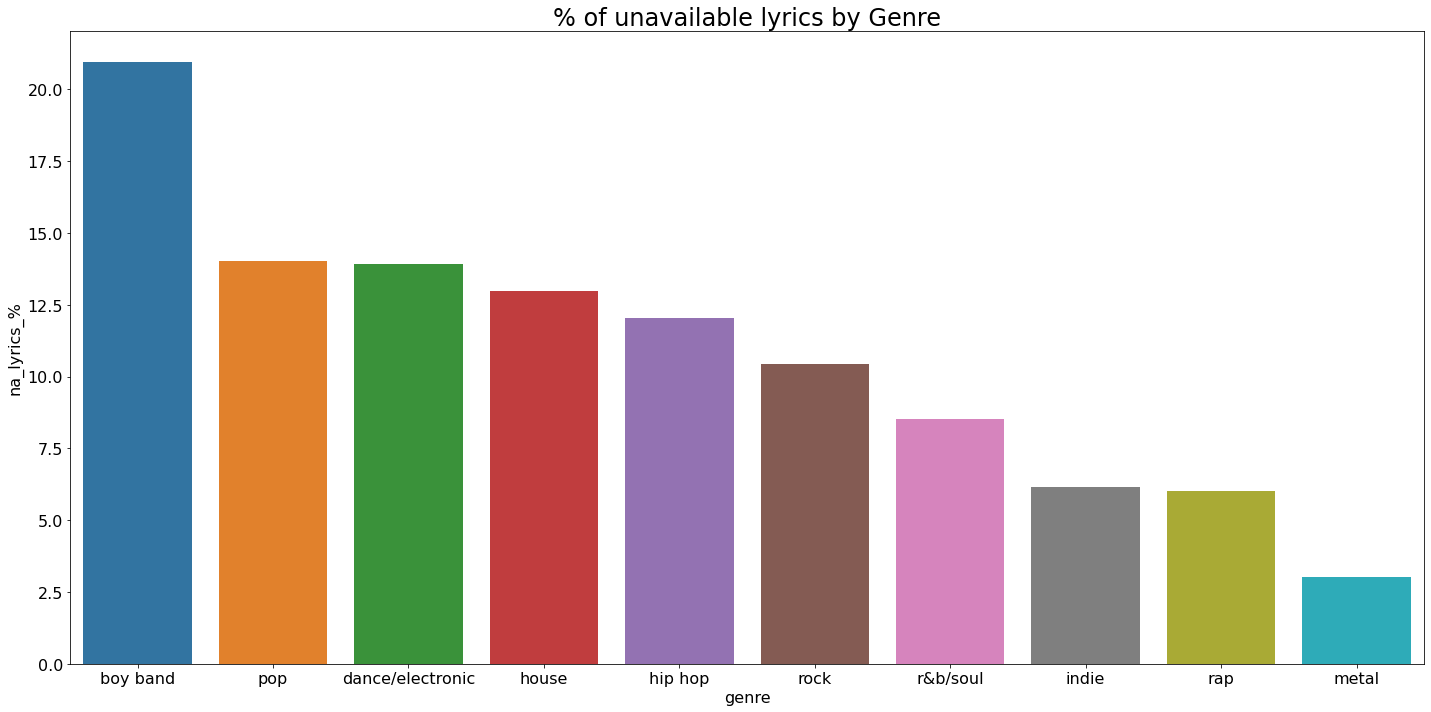

In [5]:
# bar plot of missing lyrics by genre

plt.figure(figsize=(20, 10))
plt.title('% of unavailable lyrics by Genre', fontsize=24)
plt.xlabel('genre', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

sns.barplot(x='genre', y='na_lyrics_%', data=lyrics_by_genre_df)

In [6]:
# drop songs without lyrics
songs_lyrics_df = songs_lyrics_df.dropna(subset=['lyrics'])
songs_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 1897
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             1662 non-null   object 
 1   popularity          1662 non-null   float64
 2   title               1662 non-null   object 
 3   artist              1662 non-null   object 
 4   album/single        1662 non-null   object 
 5   artist_followers    1662 non-null   int64  
 6   explicit            1662 non-null   int64  
 7   album               1662 non-null   object 
 8   release_date        1662 non-null   object 
 9   danceability        1662 non-null   float64
 10  energy              1662 non-null   float64
 11  key                 1662 non-null   int64  
 12  loudness            1662 non-null   float64
 13  mode                1662 non-null   int64  
 14  speechiness         1662 non-null   float64
 15  acousticness        1662 non-null   float64
 16  instru

In [7]:
# write to csv
songs_lyrics_df.to_csv('Data/spotify_sg_complete_3.csv', index=False, encoding='utf-8')